In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.prompt').hide();
 } else {
 $('div.input').show();
$('div.prompt').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code Toggle"></form>''')

In [4]:
from IPython.display import HTML

HTML('''{% include jupyter_benchmark_table.html num="[1, 2]" revision=0 %}''')

# Table of Contents
* [Challenge Problems](#Challenge-Problems)
	* [1. Spinodal Decomposition - Cahn-Hilliard](#1.-Spinodal-Decomposition---Cahn-Hilliard)
		* [1.1 Parameter Values](#1.1-Parameter-Values)
		* [1.2 Initial Conditions](#1.2-Initial-Conditions)
		* [1.3 Domains](#1.3-Domains)
			* [1.a Square Periodic](#1.a-Square-Periodic)
			* [1.b No Flux](#1.b-No-Flux)
			* [1.c T-Shape No Flux](#1.c-T-Shape-No-Flux)
			* [1.d Sphere](#1.d-Sphere)
		* [1.4 Tasks](#1.4-Tasks)
	* [2. Ostwald Ripening -- coupled Cahn-Hilliard and Allen-Cahn equations](#2.-Ostwald-Ripening----coupled-Cahn-Hilliard-and-Allen-Cahn-equations)
		* [2.1 Parameter Values](#2.1-Parameter-Values)
		* [2.2 Initial Conditions](#2.2-Initial-Conditions)
		* [2.3 Domains](#2.3-Domains)
			* [2.a Square Periodic](#2.a-Square-Periodic)
			* [2.b No Flux](#2.b-No-Flux)
			* [2.c T-Shape No Flux](#2.c-T-Shape-No-Flux)
			* [2.d Sphere](#2.d-Sphere)
		* [2.4 Tasks](#2.4-Tasks)


# Challenge Problems

For the first hackathon there are two challenge problems, a spinodal decomposition problem and an Ostwald ripening problem. The only solutions included here currently are with FiPy.

## 1. Spinodal Decomposition - Cahn-Hilliard

The free energy density is given by,

$$ f = f_0 \left[ c \left( \vec{r} \right) \right] + \frac{\kappa}{2} \left| \nabla c \left( \vec{r} \right) \right|^2 $$

where $f_0$ is the bulk free energy density given by,

$$ f_0\left[ c \left( \vec{r} \right) \right] =
   - \frac{A}{2} \left(c - c_m\right)^2
   + \frac{B}{4} \left(c - c_m\right)^4
   + \frac{c_{\alpha}}{4} \left(c - c_{\alpha} \right)^4
   + \frac{c_{\beta}}{4} \left(c - c_{\beta} \right)^4 $$

where $c_m = \frac{1}{2} \left( c_{\alpha} + c_{\beta} \right)$ and $c_{\alpha}$ and $c_{\beta}$ are the concentrations at which the bulk free energy density has minima (corresponding to the solubilities in the matrix phase and the second phase, respectively).

The time evolution of the concentration field, $c$, is given by the Cahn-Hilliard equation:

$$ \frac{\partial c}{\partial t} = \nabla \cdot  \left[
       D \left( c \right) \nabla \left( \frac{ \partial f_0 }{ \partial c} - \kappa \nabla^2 c \right)
   \right] $$

where $D$ is the diffusivity.

### 1.1 Parameter Values

Use the following parameter values.

<table width="200">
<tr>
<td> $c_{\alpha}$ </td>
<td> 0.05 </td>
</tr>
<tr>
<td> $c_{\beta}$ </td>
<td> 0.95 </td>
</tr>
<tr>
<td> A </td>
<td> 2.0 </td>
</tr>
<tr>
<td> $\kappa$ </td>
<td> 2.0 </td>
</tr>
</table>

with

$$ B = \frac{A}{\left( c_{\alpha} - c_m \right)^2} $$

$$ D = D_{\alpha} = D_{\beta} = \frac{2}{c_{\beta} - c_{\alpha}} $$

### 1.2 Initial Conditions

Set $c\left(\vec{r}, t\right)$ such that

$$ c\left(\vec{r}, 0\right) = \bar{c}_0 + \epsilon \cos \left( \vec{q} \cdot \vec{r} \right) $$

where

<table width="200">
<tr>
<td> $\bar{c}_0$ </td>
<td> 0.45 </td>
</tr>
<tr>
<td> $\vec{q}$ </td>
<td> $\left(\sqrt{2},\sqrt{3}\right)$ </td>
</tr>
<tr>
<td> $\epsilon$ </td>
<td> 0.01 </td>
</tr>
</table>

### 1.3 Domains

#### 1.a Square Periodic

2D square domain with $L_x = L_y = 200$ and periodic boundary conditions.

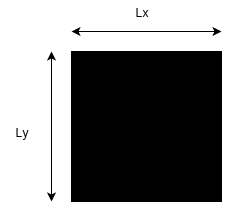

In [3]:
from IPython.display import SVG
SVG(filename='../images/block1.svg')

#### 1.b No Flux

2D square domain with $L_x = L_y = 200$ and zero flux boundary conditions.

#### 1.c T-Shape No Flux

T-shaped reiong with zero flux boundary conditions with $a=b=100$ and $c=d=20.$

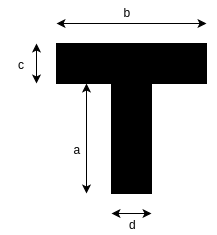

In [4]:
from IPython.display import SVG
SVG(filename='../images/t-shape.svg')

#### 1.d Sphere

Domain is the surface of a sphere with radius 100, but with initial conditions of

$$ c\left(\theta, \phi, 0\right) = \bar{c}_0 + \epsilon \cos \left( \sqrt{233} \theta \right)
                                                        \sin \left( \sqrt{239} \phi \right) $$

where $\theta$ and $\phi$ are the polar and azimuthal angles in a spherical coordinate system. $\bar{c}_0$ and $\epsilon$ are given by the values in the table above.

### 1.4 Tasks

Your task for each domain,

 1. Calculate the time evolution of the concentration -- store concentration at time steps to make a movie

 2. Plot the free energy as a function of time steps until you judge that convergence or a local equilibrium has been reached.

 3. Present wall clock time for the calculations, and wall clock time per core used in the calculation.

 4. For domain a. above, demonstrate that the solution is robust with respect to meshing by refining the mesh (e.g. reduce the mesh size by about a factor of $\sqrt{2}$ in linear dimensions -- use whatever convenient way you have to refine the mesh without exploding the computational time).

## 2. Ostwald Ripening -- coupled Cahn-Hilliard and Allen-Cahn equations

Expanded problem in that the phase field, described by variables $\eta_i$, is now coupled to the concentration field $c$. The Ginzberg-Landau free energy density is now taken to be,

$$ f = f_0 \left[ C \left( \vec{r} \right), \eta_1, ... , \eta_p \right]
+ \frac{\kappa_C}{2} \left[ \nabla  C \left( \vec{r} \right) \right]^2 +
\sum_{i=1}^p \frac{\kappa_C}{2} \left[ \nabla  \eta_i \left( \vec{r} \right) \right]^2
$$

Here, $f_0$ is a bulk free energy density,

$$ f_0 \left[ C \left( \vec{r} \right), \eta_1, ... , \eta_p \right] 
= f_1 \left( C \right) + \sum_{i=1}^p f_2 \left( C, \eta_i \right)
+ \sum_{i=1}^p \sum_{j\ne i}^p f_3 \left( \eta_j, \eta_i \right) $$

Here, $ f_1 \left( C \right) $ is the free energy density due to the concentration field, $C$, with local minima at $C_{\alpha}$ and $C_{\beta}$ corresponding to the solubilities in the matrix phase and the second phase, respectively; $f_2\left(C , \eta_i \right)$ is an interaction term between the concentration field and the phase fields, and $f_3 \left( \eta_i, \eta_j \right)$ is the free energy density of the phase fields. Simple models for these free energy densities are,

$$ f_1\left( C \right) =
   - \frac{A}{2} \left(C - C_m\right)^2
   + \frac{B}{4} \left(C - C_m\right)^4
   + \frac{D_{\alpha}}{4} \left(C - C_{\alpha} \right)^4
   + \frac{D_{\beta}}{4} \left(C - C_{\beta} \right)^4 $$

where 

$$ C_m = \frac{1}{2} \left(C_{\alpha} + C_{\beta} \right) $$

and

$$ f_2 \left( C, \eta_i \right) = - \frac{\gamma}{2} \left( C - C_{\alpha} \right)^2 \eta_i^2 + \frac{\beta}{2} \eta_i^4 $$

where

$$ f_3 \left( \eta_i, \eta_j \right) = \frac{ \epsilon_{ij} }{2} \eta_i^2 \eta_j^2, i \ne j $$

The time evolution of the system is now given by coupled Cahn-Hilliard and Allen-Cahn (time dependent Gizberg-Landau) equations for the conserved concentration field and the non-conserved phase fields:

$$
\begin{eqnarray}
\frac{\partial C}{\partial t} &=& \nabla \cdot  \left \{
       D \nabla \left[ \frac{\delta F}{\delta C} \right] \right \} \\
 &=& D \left[ -A + 3 B \left( C- C_m \right)^2 + 3 D_{\alpha} \left( C - C_{\alpha} \right)^2 + 3 D_{\beta} \left( C - C_{\beta} \right)^2 \right] \nabla^2 C \\
& & -D \gamma \sum_{i=1}^{p} \left[ \eta_i^2 \nabla^2 C + 4 \nabla C \cdot \nabla \eta_i + 2 \left( C - C_{\alpha} \right) \nabla^2 \eta_i \right] - D \kappa_C \nabla^4 C
\end{eqnarray}
$$

and the phase field equations

$$
\begin{eqnarray}
\frac{\partial \eta_i}{\partial t} &=& - L_i \frac{\delta F}{\delta \eta_i} \\
          &=& \frac{\partial f_2}{\delta \eta_i} + \frac{\partial f_3}{\delta \eta_i} - \kappa_i \nabla^2 \eta_i \left(\vec{r}, t\right) \\
          &=& L_i \gamma \left( C - C_{\alpha} \right)^2 \eta_i - L_i \beta \eta_i^3 - L_i \eta_i \sum_{j\ne i}^{p} \epsilon_{ij} \eta^2_j + L_i \kappa_i \nabla^2 \eta_i
\end{eqnarray}
$$

### 2.1 Parameter Values

Use the following parameter values.

<table width="200">
<tr>
<td> $C_{\alpha}$ </td>
<td> 0.05 </td>
</tr>
<tr>
<td> $C_{\beta}$ </td>
<td> 0.95 </td>
</tr>
<tr>
<td> A </td>
<td> 2.0 </td>
</tr>
<tr>
<td> $\kappa_i$ </td>
<td> 2.0 </td>
</tr>
<tr>
<td> $\kappa_j$ </td>
<td> 2.0 </td>
</tr>
<tr>
<td> $\kappa_k$ </td>
<td> 2.0 </td>
</tr>
<tr>
<td> $\epsilon_{ij}$ </td>
<td> 3.0 </td>
</tr>
<tr>
<td> $\beta$ </td>
<td> 1.0 </td>
</tr>
<tr>
<td> $p$ </td>
<td> 10 </td>
</tr>
</table>

with

$$ B = \frac{A}{\left( C_{\alpha} - C_m \right)^2} $$

$$ \gamma = \frac{2}{\left(C_{\beta} - C_{\alpha}\right)^2} $$

$$ D = D_{\alpha} = D_{\beta} = \frac{\gamma}{\delta^2} $$

The diffusion coefficient, $D$, is constant and isotropic and the same (unity) for both phases; the mobility-related constants, $L_i$, are the same (unity) for all phase fields.

### 2.2 Initial Conditions

Set $c\left(\vec{r}, t\right)$ such that

$$ 
\begin{eqnarray}
c\left(\vec{r}, 0\right) &=& \bar{c}_0 + \epsilon \cos \left( \vec{q} \cdot \vec{r} \right) \\
\eta_i\left(\vec{r}, 0\right) &=& \bar{\eta}_0 + 0.01 \epsilon_i \cos^2 \left( \vec{q} \cdot \vec{r} \right)
\end{eqnarray}
$$

where

<table width="200">
<tr>
<td> $\bar{c}_0$ </td>
<td> 0.5 </td>
</tr>
<tr>
<td> $\vec{q}$ </td>
<td> $\left(\sqrt{2},\sqrt{3}\right)$ </td>
</tr>
<tr>
<td> $\epsilon$ </td>
<td> 0.01 </td>
</tr>
<tr>
<td> $\vec{q}_i$ </td>
<td> $\left( \sqrt{23 + i}, \sqrt{149 + i} \right)$ </td>
</tr>
<tr>
<td> $\epsilon_i$ </td>
<td> 0.979285, 0.219812,	0.837709,	0.695603, 	0.225115,	
0.389266, 	0.585953,	0.614471, 	0.918038,	0.518569 </td>
</tr>
<tr>
<td> $\eta_0$ </td>
<td> 0.0 </td>
</tr>
</table>

### 2.3 Domains

#### 2.a Square Periodic

2D square domain with $L_x = L_y = 200$ and periodic boundary conditions.

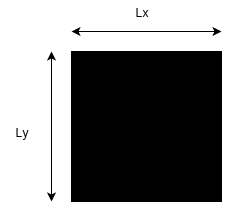

In [5]:
from IPython.display import SVG
SVG(filename='../images/block1.svg')

#### 2.b No Flux

2D square domain with $L_x = L_y = 200$ and zero flux boundary conditions.

#### 2.c T-Shape No Flux

T-shaped reiong with zero flux boundary conditions with $a=b=100$ and $c=d=20.$

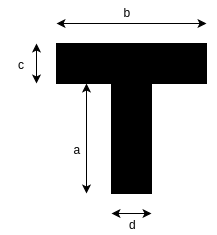

In [7]:
from IPython.display import SVG
SVG(filename='../images/t-shape.svg')

#### 2.d Sphere

Domain is the surface of a sphere with radius 100, but with initial conditions of

$$ c\left(\theta, \phi, 0\right) = \bar{c}_0 + \epsilon \cos \left( \sqrt{233} \theta \right)
                                                        \sin \left( \sqrt{239} \phi \right) $$

and

$$ \eta_i\left(\theta, \phi, 0\right) = \bar{\eta}_0 + 0.01 \epsilon_i \cos^2 \left( \sqrt{23 + i} \theta \right)
                                                        \sin^2 \left( \sqrt{149 + i} \phi \right) $$

where $\theta$ and $\phi$ are the polar and azimuthal angles in a spherical coordinate system and parameter values are in the table above.

### 2.4 Tasks

Your task for each domain,

 1. Calculate the time evolution of the concentration -- store concentration at time steps to make a movie

 2. Plot the free energy as a function of time steps until you judge that convergence or a local equilibrium has been reached.

 3. Present wall clock time for the calculations, and wall clock time per core used in the calculation.